In [1]:
# Re-import pandas since the environment reset
import pandas as pd

# Load the updated CSV file
file_path = "14.csv"
df = pd.read_csv(file_path)

# Display the first few rows to confirm the structure
df.head()

,srcStateName,Crop name,srcDistrictName,Crop season,Land area utilized for production,Crop production,Crop yield
0,GUJARAT,Sesamum,PATAN,Summer,3.0,NaN,0.00
1,PUNJAB,Maize,SANGRUR,Kharif,1000.0,4000.0,4.00
2,PUNJAB,Maize,TARN TARAN,Kharif,1000.0,4000.0,4.00
3,PUNJAB,Masoor,GURDASPUR,Rabi,200.0,140.0,0.70
4,PUNJAB,Masoor,HOSHIARPUR,Rabi,200.0,150.0,0.75


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import numpy as np

In [3]:
df = df.dropna(subset=["Crop yield"])

# Define target and features
X = df.drop(columns=["Crop yield"])
y = df["Crop yield"]

# Identify column types
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()
numerical_cols = X.select_dtypes(include=["float64", "int64"]).columns.tolist()


In [4]:
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

numerical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_cols),
        ("cat", categorical_transformer, categorical_cols)
    ]
)

In [5]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, verbosity=0)
}

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
results = {}
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("regressor", model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[name] = {"RMSE": rmse, "R2": r2, "model": pipeline}

results

{'Linear Regression': {'RMSE': 427.33060807117175,
  'R2': 0.8119500221623396,
  'model': Pipeline(steps=[('preprocessor',
                   ColumnTransformer(transformers=[('num',
                                                    Pipeline(steps=[('imputer',
                                                                     SimpleImputer()),
                                                                    ('scaler',
                                                                     StandardScaler())]),
                                                    ['Land area utilized for '
                                                     'production',
                                                     'Crop production']),
                                                   ('cat',
                                                    Pipeline(steps=[('imputer',
                                                                     SimpleImputer(strategy='most_frequent')),
            

In [7]:
#import joblib

#best_rf_model = results['Random Forest']['model']

#joblib.dump(best_rf_model, 'best_rf_yield.pkl')

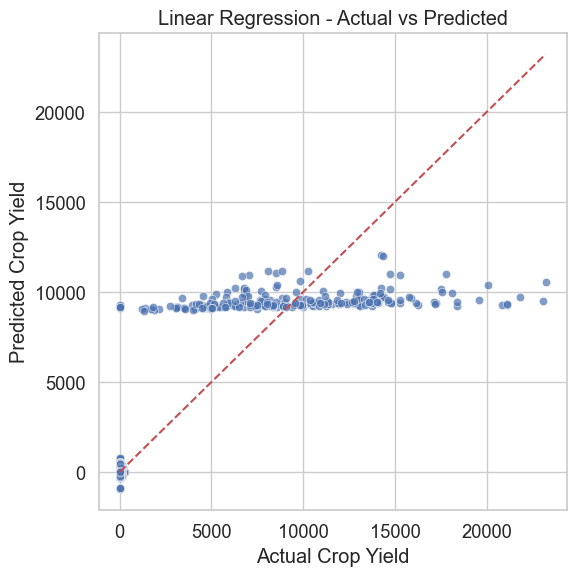

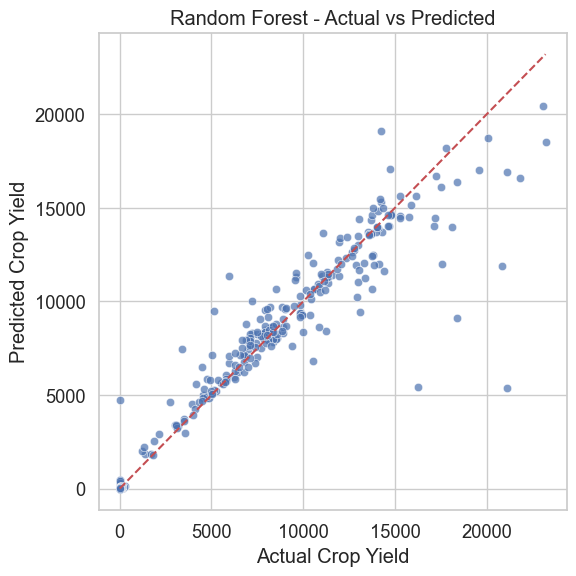

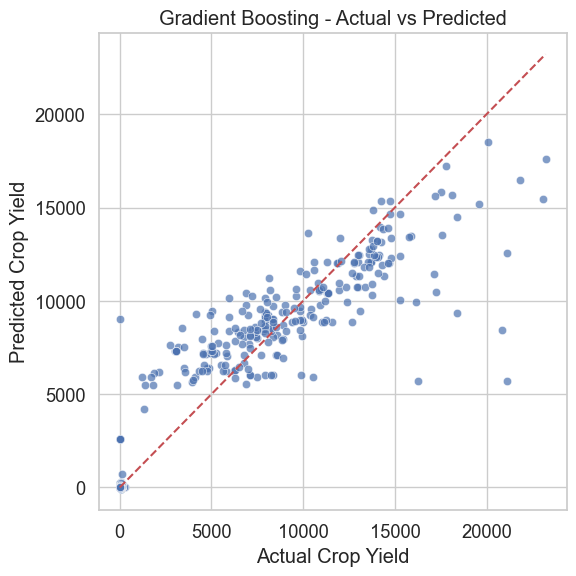

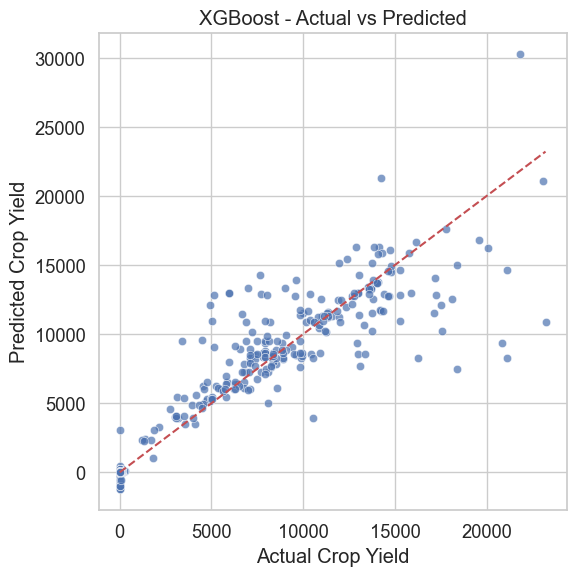

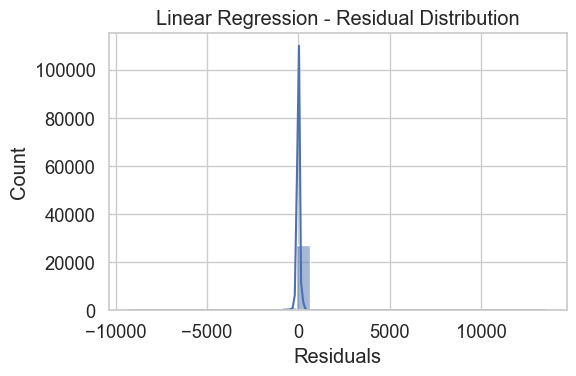

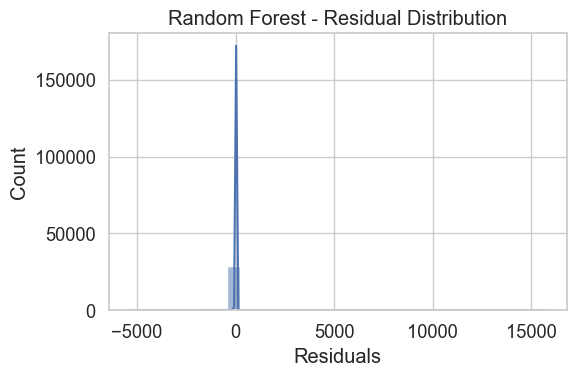

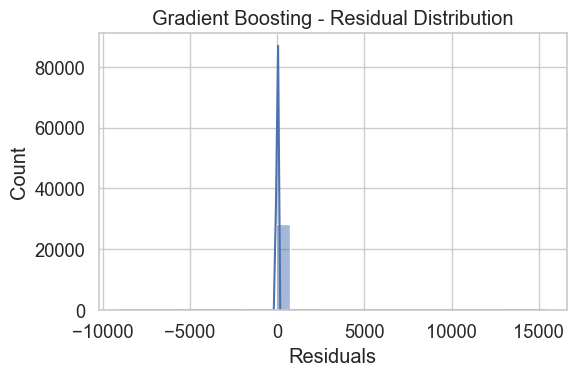

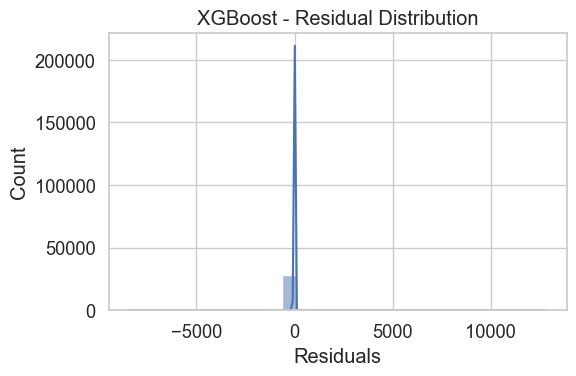

C:\Users\Namit\AppData\Local\Temp\ipykernel_6112\922883278.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=rmse_scores, palette="Blues_d")
C:\Users\Namit\AppData\Local\Temp\ipykernel_6112\922883278.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=r2_scores, palette="Greens_d")


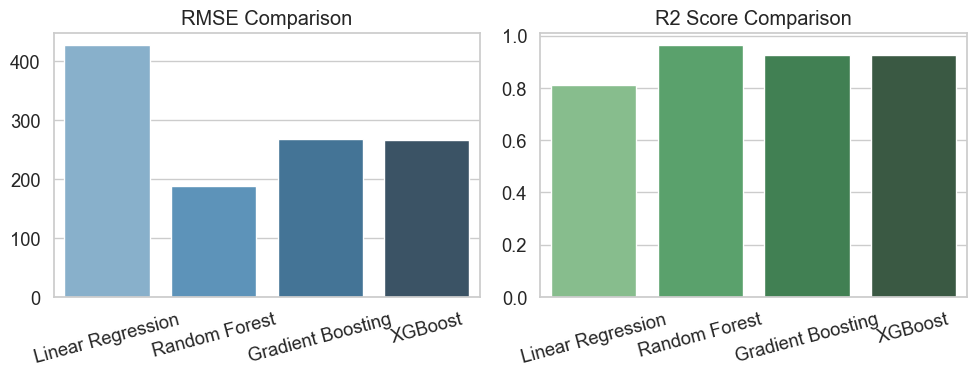

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Make plots look better
sns.set(style="whitegrid", font_scale=1.2)

# Scatter Plot: True vs Predicted
for name, metrics in results.items():
    model = metrics["model"]
    y_pred = model.predict(X_test)
    
    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Actual Crop Yield")
    plt.ylabel("Predicted Crop Yield")
    plt.title(f"{name} - Actual vs Predicted")
    plt.tight_layout()
    plt.show()

# Residual Plot
for name, metrics in results.items():
    model = metrics["model"]
    y_pred = model.predict(X_test)
    residuals = y_test - y_pred

    plt.figure(figsize=(6, 4))
    sns.histplot(residuals, bins=30, kde=True)
    plt.xlabel("Residuals")
    plt.title(f"{name} - Residual Distribution")
    plt.tight_layout()
    plt.show()

# Bar Chart: RMSE and R2 Comparison
rmse_scores = [metrics["RMSE"] for metrics in results.values()]
r2_scores = [metrics["R2"] for metrics in results.values()]
model_names = list(results.keys())

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.barplot(x=model_names, y=rmse_scores, palette="Blues_d")
plt.title("RMSE Comparison")
plt.xticks(rotation=15)

plt.subplot(1, 2, 2)
sns.barplot(x=model_names, y=r2_scores, palette="Greens_d")
plt.title("R2 Score Comparison")
plt.xticks(rotation=15)

plt.tight_layout()
plt.show()